In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

import os
from pandas import DataFrame
from scipy import stats
import matplotlib.font_manager
import sweetviz as sv
import ppscore as pps
from sklearn.preprocessing import MinMaxScaler

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.knn import KNN
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

from sklearn.ensemble import IsolationForest

## Data Analysis Basics with Pandas

In [38]:
pd.pandas.set_option("display.max_columns",None)
pd.set_option('use_inf_as_na', True)

In [39]:
# Read in dataset
data = pd.read_excel("W:/DCTC/Random Forest/Python/2020.07.06 HVL Exploration/2020.07.06 WellHeaderData.xlsx")

# Print data dimenstions (number of rows, number of columns)
print(data.shape)

# View the first few rows of the dataset
data.head(5)

(4749, 58)


,LINE,RANDOM,NUMBER,SOURCE,Source Number,Last Updated,Op vs NonOp,API14,API12,API,PetraMidX,PetraMidY,RESCAT,NAME,FIELD,COUNTY,ST,OPERATOR,RESERVOIR,ELEVATION (KB),ELEVATION (GROUND),TVD,LL,LBS/FT,FPDATE,FP YEAR,GAS EUR (MCF),OIL EUR (BBL),NWC,2018 NWC,2017 NWC,2016 NWC,2015 NWC,2014 NWC,2013 NWC,2012 NWC,2011 NWC,2010 NWC,2009 NWC,2008 NWC,As Drilled NWC,SH Latitude,SH Longitude,BH Latitude,BH Longitude,Net to Gross (4% Phi Cutoff),Net to Gross (8% Phi Cutoff),OGIP (4% Phi Cutoff),OGIP (8% Phi Cutoff),OGIP/GT (4% Phi Cutoff),OGIP/GT (8% Phi Cutoff),EUR/Ft,DI Practical IP,DI Gas Daily Rate,DI 1 Month Gas,DI 6 Month CUM,DI 12 Month CUM,DI First Test Gas Volume
0,1,0.408494,8,DI,000008,2020-03-31,NONOP,17017342380000,170173423800,1701734238,1337858.35,11748405.60,11000,MARTIN ROY 23H 1,GREENWOOD-WASKOM,CADDO,LA,CHESAPEAKE,HAYNESVILLE,289.12,265.12,11484.00,4062.0,659.211144,2008-07-01,2008.0,2.106648e+06,0.0,1.480434,1.524879,1.524879,1.524879,1.524879,1.417210,1.417210,1.417210,1.409923,1.423519,1.418701,0.814100,0.814100,32.369389,-93.979988,32.356873,-93.980389,0.86,0.60,162.57,120.99,0.696714,0.519181,518.623,2789.2903,376.9691,123817.0,390459.0,490004.0,3979.0
1,2,0.074846,9,DI,000009,2020-03-31,NONOP,17017342570000,170173425700,1701734257,1355135.90,11743370.20,11000,SRLT 29 2ALT,JOHNSON BRANCH,CADDO,LA,CHESAPEAKE,HAYNESVILLE,275.56,247.56,11706.00,4224.0,352.000000,2007-10-01,2007.0,1.165165e+06,24.0,0.998251,0.971432,0.971432,0.971432,0.971432,0.953708,0.953708,0.953708,0.994635,0.993574,0.955759,0.843008,0.843008,32.345797,-93.918437,32.354143,-93.930474,0.94,0.73,140.76,118.00,0.703701,0.587445,275.844,2172.9667,208.1233,55393.0,263211.0,348610.0,2647.0
2,3,0.078897,11,DI,000011,2020-03-31,NONOP,17017342970000,170173429700,1701734297,1372326.50,11753768.00,11000,CHIGGERO 14H 1,METCALF,CADDO,LA,CHESAPEAKE,HAYNESVILLE,195.00,181.00,14550.00,3049.0,2957.976243,2008-07-01,2008.0,6.184459e+06,0.0,0.766312,0.737059,0.737059,0.737059,0.737059,0.731659,0.731659,0.731659,0.774552,0.754649,0.727722,0.595234,0.595234,32.374421,-93.868364,32.374421,-93.868364,0.93,0.63,134.09,104.22,0.658588,0.511459,2028.357,4455.3548,907.5027,54307.0,511717.0,718823.0,4634.0
3,4,0.655714,12,DI,000012,2020-03-31,NONOP,17017343140000,170173431400,1701734314,1335205.15,11711505.20,11000,BRAY 27H 1,BETHANY LONGSTREET,CADDO,LA,CHESAPEAKE,HAYNESVILLE,339.00,311.00,11412.19,4027.0,0.000000,2008-09-01,2008.0,1.398889e+06,0.0,2.221564,1.944644,1.622499,1.622499,1.622499,1.655913,1.655913,1.655913,1.659251,1.658169,0.822942,0.842586,0.842586,32.255658,-93.987770,32.267620,-93.987793,0.91,0.48,159.07,105.85,0.685141,0.455759,347.378,2196.2903,267.2334,63926.0,290997.0,426304.0,3720.0
4,5,0.292652,13,DI,000013,2020-03-31,NONOP,17017343150000,170173431500,1701734315,1360611.40,11711118.75,11000,FEIST 28,CASPIANA,CADDO,LA,CHESAPEAKE,HAYNESVILLE,280.00,252.00,11596.56,3687.0,496.000000,2008-01-01,2008.0,2.010094e+06,0.0,2.953830,3.056816,2.301864,2.301864,2.301864,2.326322,2.326322,1.538302,1.540305,1.497429,1.510324,1.504753,1.504753,32.255444,-93.905791,32.267173,-93.905731,0.96,0.66,147.49,112.38,0.696521,0.531071,545.184,252.1379,390.9984,53833.0,418617.0,736836.0,2645.0


#### Basic data analysis functions in pandas:
- mean(), median(), std()

#### Unique pandas funtions
- value_counts(): returns the number of obervations in each group of a categorical variable


- describe(): returns summary statistics (mean,median,std,min, max, ect.) of each numerical column


- corr(): returns a correlation matrix displaying the pairwise pearson or spearman correlation between numerical columns


- sample(): randomly sample rows from the dataset


- nsmallest() / nlargest(): returns n rows of the smallest/largest values of a selected column


- groupby(): a very useful methods that aggregates data based on specified column(s)


- query(): filter data based on specified condtions - similar to a SQL query


- isnull(): finds missing values in the dataset

In [40]:
# Basic functions
# Mean
print("Mean EUR/Ft:",data['EUR/Ft'].mean())

# Median
print("Median EUR/Ft:",data['EUR/Ft'].median())

# Standard Deviation
print("Std EUR/Ft:",data['EUR/Ft'].std())

Mean EUR/Ft: 1252.7219079224599
Median EUR/Ft: 1126.683
Std EUR/Ft: 877.7072349446643


In [41]:
# Value counts
print("Year Value Counts:")
print(data['FP YEAR'].value_counts())
print('')

print("Year Value Distribution:")
print(data['FP YEAR'].value_counts() / data['FP YEAR'].shape[0])

Year Value Counts:
2011.0    1067
2010.0     894
2012.0     471
2009.0     442
2018.0     358
2019.0     292
2014.0     251
2017.0     249
2013.0     229
2015.0     179
2016.0     142
2008.0      80
2020.0       8
2007.0       1
Name: FP YEAR, dtype: int64

Year Value Distribution:
2011.0    0.224679
2010.0    0.188250
2012.0    0.099179
2009.0    0.093072
2018.0    0.075384
2019.0    0.061487
2014.0    0.052853
2017.0    0.052432
2013.0    0.048221
2015.0    0.037692
2016.0    0.029901
2008.0    0.016846
2020.0    0.001685
2007.0    0.000211
Name: FP YEAR, dtype: float64


In [42]:
# Descriptive Statistics
data.describe()

,LINE,RANDOM,NUMBER,API14,API12,API,PetraMidX,PetraMidY,RESCAT,ELEVATION (KB),ELEVATION (GROUND),TVD,LL,LBS/FT,FP YEAR,GAS EUR (MCF),OIL EUR (BBL),NWC,2018 NWC,2017 NWC,2016 NWC,2015 NWC,2014 NWC,2013 NWC,2012 NWC,2011 NWC,2010 NWC,2009 NWC,2008 NWC,As Drilled NWC,SH Latitude,SH Longitude,BH Latitude,BH Longitude,Net to Gross (4% Phi Cutoff),Net to Gross (8% Phi Cutoff),OGIP (4% Phi Cutoff),OGIP (8% Phi Cutoff),OGIP/GT (4% Phi Cutoff),OGIP/GT (8% Phi Cutoff),EUR/Ft,DI Practical IP,DI Gas Daily Rate,DI 1 Month Gas,DI 6 Month CUM,DI 12 Month CUM,DI First Test Gas Volume
count,4749.000000,4749.000000,4749.000000,4.749000e+03,4.749000e+03,4.749000e+03,4.176000e+03,4.176000e+03,4749.000000,4749.000000,4749.000000,4749.000000,4744.000000,4749.000000,4663.000000,4.705000e+03,4749.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4749.000000,4749.000000,4749.000000,4749.000000,3985.000000,3985.000000,3985.000000,3985.000000,4087.000000,3985.000000,4746.000000,4553.000000,4569.000000,4.562000e+03,4.457000e+03,4.281000e+03,4447.000000
mean,2375.000000,0.504371,148370.206570,2.361492e+13,2.361492e+11,2.361492e+09,1.389010e+06,1.165192e+07,11009.770478,271.998903,245.314820,11977.235871,5180.260401,1544.147100,2012.607120,6.748037e+06,457.334329,3.187669,2.939744,2.619652,2.400605,2.270426,2.112041,1.875296,1.673329,1.270312,0.635473,0.219796,0.032476,2.489371,32.100276,-93.821542,32.099664,-93.821508,0.842918,0.490994,110.344891,71.995965,0.640272,0.414988,1252.721908,9848.393448,3564.359255,1.921003e+05,1.428298e+06,2.295006e+06,15640.292858
std,1371.062544,0.286589,88768.448595,1.109843e+13,1.109843e+11,1.109843e+09,1.036228e+05,9.251056e+04,29.694633,72.231456,72.726799,1462.478713,1730.522648,1252.374076,3.183783,5.183491e+06,5579.447891,2.012952,2.053585,2.079044,2.072805,2.069295,2.033296,1.915083,1.823275,1.501735,0.771241,0.417116,0.168487,1.888204,0.262375,0.336304,0.263695,0.336317,0.169230,0.244204,33.453747,32.534092,0.156322,0.187677,877.707235,5710.778276,4644.307474,1.721496e+05,8.624171e+05,1.369645e+06,9216.723892
min,1.000000,0.000091,8.000000,1.701322e+13,1.701322e+11,1.701322e+09,1.098729e+06,1.136492e+07,11000.000000,130.000000,121.000000,115.000000,14.000000,0.000000,2007.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.315318,-94.755733,31.291832,-94.755733,0.000000,0.000000,0.000000,0.000000,0.005334,0.000000,0.000000,0.250000,2.346200,4.300000e+01,8.300000e+01,3.445000e+03,8.000000
25%,1188.000000,0.256030,1896.000000,1.703125e+13,1.703125e+11,1.703125e+09,1.326618e+06,1.162119e+07,11000.000000,209.000000,182.000000,11398.770000,4273.000000,774.000000,2010.000000,3.445510e+06,0.000000,1.401226,1.102143,0.918361,0.884676,0.867238,0.840469,0.805225,0.740229,0.456116,0.000000,0.000000,0.000000,0.907158,32.006245,-94.034122,32.006372,-94.035335,0.780000,0.290000,91.660000,53.660000,0.559528,0.289328,749.272000,6177.300000,1026.939200,7.058425e+04,8.796360e+05,1.434542e+06,9780.500000
50%,2375.000000,0.500414,201166.000000,1.703126e+13,1.703126e+11,1.703126e+09,1.409660e+06,1.167420e+07,11000.000000,273.000000,246.000000,11942.000000,4566.000000,1310.000000,2011.000000,5.231344e+06,0.000000,2.848899,2.459969,1.810721,1.642983,1.505588,1.290954,1.056075,0.948474,0.890386,0.577831,0.000000,0.000000,1.755240,32.164981,-93.757386,32.164637,-93.758568,0.900000,0.490000,114.150000,71.810000,0.663813,0.456223,1126.683000,8780.967700,1593.962400,1.476085e+05,1.235572e+06,2.009086e+06,14026.000000
75%,3562.000000,0.752748,202403.000000,4.220335e+13,4.220335e+11,4.220335e+09,1.467490e+06,1.170633e+07,11000.000000,326.720000,300.450000,12514.650000,5475.000000,2005.555802,2015.000000,8.521929e+06,0.000000,4.689937,4.416370,4.021240,3.612145,3.339547,2.887085,2.205857,1.798063,1.556351,0.912991,0.265990,0.000000,3.766266

In [43]:
# Correlation matrix
data.corr(method="spearman").head(15)

,LINE,RANDOM,NUMBER,API14,API12,API,PetraMidX,PetraMidY,RESCAT,ELEVATION (KB),ELEVATION (GROUND),TVD,LL,LBS/FT,FP YEAR,GAS EUR (MCF),OIL EUR (BBL),NWC,2018 NWC,2017 NWC,2016 NWC,2015 NWC,2014 NWC,2013 NWC,2012 NWC,2011 NWC,2010 NWC,2009 NWC,2008 NWC,As Drilled NWC,SH Latitude,SH Longitude,BH Latitude,BH Longitude,Net to Gross (4% Phi Cutoff),Net to Gross (8% Phi Cutoff),OGIP (4% Phi Cutoff),OGIP (8% Phi Cutoff),OGIP/GT (4% Phi Cutoff),OGIP/GT (8% Phi Cutoff),EUR/Ft,DI Practical IP,DI Gas Daily Rate,DI 1 Month Gas,DI 6 Month CUM,DI 12 Month CUM,DI First Test Gas Volume
LINE,1.000000,-0.013544,1.000000,-0.375629,-0.375629,-0.375629,0.137133,0.195579,-0.119954,-0.155369,-0.160062,-0.138035,0.069484,0.104724,0.117917,0.187462,-0.225408,0.144304,0.096536,0.045538,0.021580,0.007368,-0.023604,-0.031705,-0.023761,0.035031,0.063526,0.076976,0.021742,0.116769,0.145229,0.145376,0.143643,0.145576,0.069271,0.145637,0.140188,0.274052,0.010158,0.159439,0.158291,0.132251,0.169705,0.159015,0.152731,0.149405,-0.101594
RANDOM,-0.013544,1.000000,-0.013544,0.029086,0.029086,0.029086,-0.001164,-0.020996,0.002566,-0.009493,-0.008509,0.017044,-0.004074,0.006458,0.014707,-0.015773,-0.003313,0.018632,0.020465,0.019970,0.017848,0.011981,0.012873,0.009871,0.003217,-0.009396,0.007368,0.000341,0.005526,0.027727,-0.014176,0.003929,-0.015124,0.003941,-0.006241,0.002707,-0.015149,-0.003833,0.019846,0.019782,-0.016266,-0.009532,0.001499,-0.011171,-0.007402,-0.004992,-0.008051
NUMBER,1.000000,-0.013544,1.000000,-0.375629,-0.375629,-0.375629,0.137133,0.195579,-0.119954,-0.155369,-0.160062,-0.138035,0.069484,0.104724,0.117917,0.187462,-0.225408,0.144304,0.096536,0.045538,0.021580,0.007368,-0.023604,-0.031705,-0.023761,0.035031,0.063526,0.076976,0.021742,0.116769,0.145229,0.145376,0.143643,0.145576,0.069271,0.145637,0.140188,0.274052,0.010158,0.159439,0.158291,0.132251,0.169705,0.159015,0.152731,0.149405,-0.101594
API14,-0.375629,0.029086,-0.375629,1.000000,1.000000,1.000000,-0.443610,-0.503888,-0.079587,0.355806,0.363191,0.185187,0.222683,0.071480,0.238079,-0.049640,0.292851,-0.043537,-0.060551,-0.076439,-0.091152,-0.108537,-0.127313,-0.144103,-0.183461,-0.284009,-0.296360,-0.237040,-0.121865,0.073039,-0.485904,-0.464812,-0.488232,-0.464516,0.004498,-0.155750,-0.118220,-0.393894,0.106453,-0.179388,-0.138712,0.006630,0.021957,-0.105882,-0.004667,-0.024144,0.273349
API12,-0.375629,0.029086,-0.375629,1.000000,1.000000,1.000000,-0.443610,-0.503888,-0.079587,0.355806,0.363191,0.185187,0.222683,0.071480,0.238079,-0.049640,0.292851,-0.043537,-0.060551,-0.076439,-0.091152,-0.108537,-0.127313,-0.144103,-0.183461,-0.284009,-0.296360,-0.237040,-0.121865,0.073039,-0.485904,-0.464812,-0.488232,-0.464516,0.004498,-0.155750,-0.118220,-0.393894,0.106453,-0.179388,-0.138712,0.006630,0.021957,-0.105882,-0.004667,-0.024144,0.273349
API,-0.375629,0.029086,-0.375629,1.000000,1.000000,1.000000,-0.443610,-0.503888,-0.079587,0.355806,0.363191,0.185187,0.222683,0.071480,0.238079,-0.049640,0.292851,-0.043537,-0.060551,-0.076439,-0.091152,-0.108537,-0.127313,-0.144103,-0.183461,-0.284009,-0.296360,-0.237040,-0.121865,0.073039,-0.485904,-0.464812,-0.488232,-0.464516,0.004498,-0.155750,-0.118220,-0.393894,0.106453,-0.179388,-0.138712,0.006630,0.021957,-0.105882,-0.004667,-0.024144,0.273349
PetraMidX,0.137133,-0.001164,0.137133,-0.443610,-0.443610,-0.443610,1.000000,0.152235,0.094076,-0.632426,-0.638578,0.257035,-0.236497,0.006213,-0.072323,0.118255,-0.358773,0.046065,0.060120,0.076695,0.079384,0.072020,0.092084,0.101676,0.137074,0.177183,0.183087,0.070992,0.054199,-0.004271,0.161533,0.998143,0.162059,0.998132,-0.253769,-0.049184,-0.559493,-0.032662,-0.301764,0.053493,0.218725,0.187233,0.150345,0.186307,0.240516,0.256558,-0.105617
PetraMidY,0.195579,-0.020996,0.195579,-0.503888,-0.503888,-0.503888,0.152235,1.000000,-0.027779,-0.306935,-0.307156,-0.523556,-0.017177,-0.021064,-0.045713,0.113459,0.078929,0.110479,0.097420,0.074315,0.088461,0.095833,0.074900,0.024217,-0.018073,0.050875,0.192102,0

In [44]:
# Randomly sample rows
data.sample(5)

,LINE,RANDOM,NUMBER,SOURCE,Source Number,Last Updated,Op vs NonOp,API14,API12,API,PetraMidX,PetraMidY,RESCAT,NAME,FIELD,COUNTY,ST,OPERATOR,RESERVOIR,ELEVATION (KB),ELEVATION (GROUND),TVD,LL,LBS/FT,FPDATE,FP YEAR,GAS EUR (MCF),OIL EUR (BBL),NWC,2018 NWC,2017 NWC,2016 NWC,2015 NWC,2014 NWC,2013 NWC,2012 NWC,2011 NWC,2010 NWC,2009 NWC,2008 NWC,As Drilled NWC,SH Latitude,SH Longitude,BH Latitude,BH Longitude,Net to Gross (4% Phi Cutoff),Net to Gross (8% Phi Cutoff),OGIP (4% Phi Cutoff),OGIP (8% Phi Cutoff),OGIP/GT (4% Phi Cutoff),OGIP/GT (8% Phi Cutoff),EUR/Ft,DI Practical IP,DI Gas Daily Rate,DI 1 Month Gas,DI 6 Month CUM,DI 12 Month CUM,DI First Test Gas Volume
1596,1597,0.332587,200369,COMSTOCK,000758,2019-12-31,OP,42347331830000,423473318300,4234733183,1177820.50,11463994.55,11000,EDGAR 01H,CARTHAGE,NACOGDOCHES,TX,COMSTOCK,HAYNESVILLE,467.00,442.00,13648.00,4592.0,1633.000000,2011-01-01,2011.0,5.045749e+06,0.0,1.772070,1.762719,1.762719,0.917351,0.917351,0.917351,0.917351,0.917351,0.917351,0.00000,0.000000,0.0,0.917351,31.583511,-94.486317,31.569230,-94.485827,1.00,0.67,118.83,71.09,0.826934,0.494677,1098.813,10509.1429,1349.5949,219292.0,1426916.0,2157684.0,38496.0
1289,1290,0.570914,200034,EXCO,000477,2019-12-31,OP,42419315440000,424193154400,4241931544,1315085.10,11505880.80,11000,MORRISON 1H,CARTHAGE,SHELBY,TX,EXCO RESOURCES,HAYNESVILLE,395.00,371.00,12523.00,5105.0,1136.141038,2010-09-01,2010.0,3.799512e+06,6.0,1.020040,1.020040,1.020040,1.020040,1.020040,1.020040,1.020040,1.020040,1.020040,1.02004,0.000000,0.0,1.020040,31.703813,-94.047020,31.688414,-94.047065,0.82,0.47,121.16,71.86,0.840504,0.498612,744.273,8102.0645,923.9734,238207.0,1142362.0,1655484.0,24374.0
3915,3916,0.720849,202782,BP LAHA,1701322041,2019-12-31,OP,17013220410000,170132204100,1701322041,1528701.30,11751209.35,11000,SST FOREST 14-1H,LAKE BISTINEAU,BIENVILLE,LA,BP,HAYNESVILLE,248.00,220.00,10927.22,5295.0,2928.000000,2011-09-01,2011.0,3.321476e+06,0.0,1.331350,1.157900,1.157900,1.157900,1.157900,1.458606,1.458606,0.957836,0.919984,0.00000,0.000000,0.0,0.919984,32.381542,-93.361453,32.367034,-93.362840,0.87,0.67,71.62,46.35,0.314957,0.185742,627.285,4789.5806,846.1062,52720.0,664115.0,1110551.0,4656.0
1265,1266,0.359644,200010,EXCO,003292,2019-12-31,OP,42419317690000,424193176900,4241931769,1239911.35,11492681.95,11000,DONATILL 1H,CARTHAGE,SHELBY,TX,EXCO RESOURCES,HAYNESVILLE,422.00,398.00,12732.00,6751.0,2115.640000,2015-11-01,2015.0,6.489077e+06,0.0,2.042867,2.075984,2.075984,2.075984,2.075984,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,2.075984,31.666865,-94.288196,31.647933,-94.288527,0.99,0.52,122.71,73.27,0.858214,0.511555,961.202,8139.4839,2832.1905,133907.0,1302001.0,2315595.0,8750.0
4630,4631,0.951449,203498,GOODRICH,1703125859,2019-12-31,NONOP,17031258590000,170312585900,1703125859,1366026.70,11694988.15,11000,HA RA SUCC;JOHNSON 10-14-15 H 003-ALT,BETHANY LONGSTREET,DE SOTO,LA,CHESAPEAKE,HAYNESVILLE,308.44,280.44,11844.68,4405.0,2304.040367,2013-10-01,2013.0,5.525376e+06,0.0,3.813760,3.770205,3.770205,3.770205,3.770205,3.882786,3.882786,0.629024,0.603002,0.59893,0.632168,0.0,3.882786,32.223538,-93.886152,32.210755,-93.889125,0.97,0.65,150.75,115.44,0.713863,0.548852,1254.342,9392.8000,1876.1834,213299.0,1392522.0,2326061.0,14088.0


In [45]:
# nsmallest
data.nsmallest(5,'LL')

,LINE,RANDOM,NUMBER,SOURCE,Source Number,Last Updated,Op vs NonOp,API14,API12,API,PetraMidX,PetraMidY,RESCAT,NAME,FIELD,COUNTY,ST,OPERATOR,RESERVOIR,ELEVATION (KB),ELEVATION (GROUND),TVD,LL,LBS/FT,FPDATE,FP YEAR,GAS EUR (MCF),OIL EUR (BBL),NWC,2018 NWC,2017 NWC,2016 NWC,2015 NWC,2014 NWC,2013 NWC,2012 NWC,2011 NWC,2010 NWC,2009 NWC,2008 NWC,As Drilled NWC,SH Latitude,SH Longitude,BH Latitude,BH Longitude,Net to Gross (4% Phi Cutoff),Net to Gross (8% Phi Cutoff),OGIP (4% Phi Cutoff),OGIP (8% Phi Cutoff),OGIP/GT (4% Phi Cutoff),OGIP/GT (8% Phi Cutoff),EUR/Ft,DI Practical IP,DI Gas Daily Rate,DI 1 Month Gas,DI 6 Month CUM,DI 12 Month CUM,DI First Test Gas Volume
3730,3731,0.599458,202596,EXCO,000312,2019-12-31,OP,17017345240000,170173452400,1701734524,1421629.10,11734617.2,11000,DEBROECK 33V-1,ELM GROVE,CADDO,LA,EXCO RESOURCES,HAYNESVILLE,189.0,175.0,15000.0,14.0,0.000000,2008-11-01,2008.0,58234.0,2.0,0.720000,0.720000,0.720000,0.720000,0.720000,0.720000,0.720000,0.720000,0.720000,0.720000,0.620000,0.62,0.620000,32.327199,-93.708694,32.327199,-93.708694,NaN,NaN,NaN,NaN,0.636533,NaN,4159.571,266.5806,18.6971,4956.0,28781.0,36819.0,286.0
10,11,0.937954,26,DI,000026,2020-03-31,NONOP,17031243680000,170312436800,1703124368,1319917.90,11651545.9,11100,WYRHAESR 01 HAY,BELLE BOWER,DE SOTO,LA,COMSTOCK,HAYNESVILLE,301.7,287.7,11850.0,40.0,0.000000,2008-08-01,2008.0,431430.0,1359.0,3.400000,3.400000,2.540000,2.540000,2.540000,1.640000,1.640000,1.640000,1.640000,1.640000,1.270000,0.63,0.630000,32.096531,-94.035453,32.096531,-94.035453,0.97,0.43,127.99,68.20,0.625700,0.000000,10785.750,217.2333,136.3559,9245.0,34249.0,104704.0,300.0
1571,1572,0.859931,200344,EXCO,003129,2019-12-31,NONOP,42347332240000,423473322400,4234733224,1229798.00,11436979.9,11000,LONGHORNS DU 3,BOGGY CREEK,NACOGDOCHES,TX,XTO ENERGY,HAYNESVILLE,210.0,181.0,12646.0,45.0,4768.088889,2011-11-01,2011.0,304130.0,0.0,0.513990,0.510302,0.510302,0.510302,0.510302,0.507753,0.507753,0.507753,0.000004,0.000000,0.000000,0.00,0.000004,31.503580,-94.318151,31.503667,-94.318125,NaN,NaN,NaN,NaN,0.880628,NaN,6758.444,1398.4194,112.6747,26314.0,75631.0,129963.0,7200.0
3721,3722,0.622284,202587,COMSTOCK,001300,2019-12-31,NONOP,17017346320000,170173463200,1701734632,1365231.05,11594029.8,11100,"GIGLIO, JJ 19-1V",ELM GROVE,CADDO,LA,AETHON ENERGY,HAYNESVILLE,199.0,185.0,15000.0,101.0,0.000000,2009-04-01,2009.0,196560.0,56.0,2.618629,2.600971,2.600971,2.600971,2.600971,2.618624,2.618624,2.618624,2.635679,2.634305,2.621563,0.00,2.621563,32.366573,-93.742846,32.366573,-93.742846,0.68,0.22,123.96,74.06,0.663612,0.395789,1946.139,207.2258,74.8066,64.0,15675.0,33018.0,316.0
2317,2318,0.183536,201108,COMSTOCK,001313,2019-12-31,NONOP,17081209240000,170812092400,1708120924,1534899.50,11692962.6,11100,"MOORE, BS 12-1V",WOODARDVILLE,RED RIVER,LA,GEP HAYNESVILLE,HAYNESVILLE,248.0,234.0,12476.0,124.0,0.000000,2008-12-01,2008.0,2891545.0,0.0,1.970000,1.970000,1.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,32.214186,-93.341455,32.214186,-93.341455,0.80,0.33,86.97,59.81,0.518067,0.000000,23318.911,465.0968,94.3091,14688.0,50631.0,83413.0,360.0


In [46]:
# nlargest
data.nlargest(5,'LL')

,LINE,RANDOM,NUMBER,SOURCE,Source Number,Last Updated,Op vs NonOp,API14,API12,API,PetraMidX,PetraMidY,RESCAT,NAME,FIELD,COUNTY,ST,OPERATOR,RESERVOIR,ELEVATION (KB),ELEVATION (GROUND),TVD,LL,LBS/FT,FPDATE,FP YEAR,GAS EUR (MCF),OIL EUR (BBL),NWC,2018 NWC,2017 NWC,2016 NWC,2015 NWC,2014 NWC,2013 NWC,2012 NWC,2011 NWC,2010 NWC,2009 NWC,2008 NWC,As Drilled NWC,SH Latitude,SH Longitude,BH Latitude,BH Longitude,Net to Gross (4% Phi Cutoff),Net to Gross (8% Phi Cutoff),OGIP (4% Phi Cutoff),OGIP (8% Phi Cutoff),OGIP/GT (4% Phi Cutoff),OGIP/GT (8% Phi Cutoff),EUR/Ft,DI Practical IP,DI Gas Daily Rate,DI 1 Month Gas,DI 6 Month CUM,DI 12 Month CUM,DI First Test Gas Volume
1031,1032,0.562068,1620,DI,001620,2020-03-31,NONOP,42365384310000,423653843100,4236538431,NaN,NaN,11000,JESTER GAS UNIT,CARTHAGE,PANOLA,TX,SABINE OIL & GAS,HAYNESVILLE,334.00,306.00,11053.00,18743.0,0.0,2019-02-01,2019.0,2.720792e+07,5.0,2.292898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.292898,32.217870,-94.063907,32.245603,-94.068256,NaN,NaN,NaN,NaN,NaN,NaN,1451.631,25690.6774,19809.8581,594225.0,4013101.0,NaN,NaN
4647,4648,0.437432,203515,BP ETX HV,4240530651,2019-12-31,OP,42405306510000,424053065100,4240530651,NaN,NaN,11000,WALLABY GAS UNIT,CARTHAGE,SAN AUGUSTINE,TX,BP,HAYNESVILLE,321.00,287.00,13489.00,17345.0,0.0,2018-08-01,2018.0,1.388881e+07,0.0,4.478495,3.149409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.149409,31.480701,-94.266170,31.500859,-94.269531,NaN,NaN,NaN,NaN,NaN,NaN,800.738,13110.5333,11702.0205,235098.0,2369990.0,4920852.0,NaN
1001,1002,0.169957,1578,DI,001578,2020-03-31,NONOP,42405306280000,424053062800,4240530628,NaN,NaN,11000,BSI SKYHAWKS DU,CARTHAGE,SAN AUGUSTINE,TX,XTO ENERGY,HAYNESVILLE,256.00,233.00,14081.86,17233.0,0.0,2018-05-01,2018.0,2.082366e+07,0.0,4.372365,4.689179,4.689179,1.905794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,4.689179,31.398733,-94.243904,31.419291,-94.242633,NaN,NaN,NaN,NaN,NaN,NaN,1208.359,6955.8667,7247.5820,216252.0,1198500.0,2609620.0,NaN
1152,1153,0.967103,1826,DI,001826,2020-03-31,NONOP,17081211050000,170812110500,1708121105,NaN,NaN,11100,JUR RB SUI;BLACKSTONE IVORY 8H,BRACKY BRANCH,RED RIVER,LA,GEP HAYNESVILLE,HAYNESVILLE,200.61,172.61,1494.00,16796.0,0.0,2010-07-01,2010.0,1.566380e+06,0.0,1.062070,1.062070,1.062070,1.062070,1.062070,1.062070,1.062070,1.062070,1.062070,1.062070,0.0,0.0,1.062070,32.135136,-93.306559,32.120679,-93.308729,NaN,NaN,NaN,NaN,NaN,NaN,93.259,9303.2903,2863.5832,192384.0,1304397.0,1560904.0,15350.0
1141,1142,0.191400,1795,DI,001795,2020-03-31,NONOP,17085221750000,170852217500,1708522175,NaN,NaN,11100,HA RA SUM;OLYMPIA MINERALS 4 H,BAYOU SAN MIGUEL,SABINE,LA,VINE OIL & GAS LP,HAYNESVILLE,324.28,296.28,1659.00,16082.0,0.0,2010-12-01,2010.0,2.890952e+06,0.0,1.505501,1.351423,1.351423,1.351423,1.351423,1.488325,1.488325,1.131023,0.416135,0.416135,0.0,0.0,0.416135,31.700262,-93.600161,31.713701,-93.600089,NaN,NaN,NaN,NaN,NaN,NaN,179.763,1343.5000,3971.0879,30509.0,196151.0,224948.0,12568.0


In [47]:
# Missing values
print("Percentages of missing data:")
data.isnull().sum() / data.shape[0] * 100

Percentages of missing data:


LINE                             0.000000
RANDOM                           0.000000
NUMBER                           0.000000
SOURCE                           0.000000
Source Number                    0.000000
Last Updated                     0.000000
Op vs NonOp                      0.000000
API14                            0.000000
API12                            0.000000
API                              0.000000
PetraMidX                       12.065698
PetraMidY                       12.065698
RESCAT                           0.000000
NAME                             0.000000
FIELD                            0.000000
COUNTY                           0.000000
ST                               0.000000
OPERATOR                         0.000000
RESERVOIR                        0.000000
ELEVATION (KB)                   0.000000
ELEVATION (GROUND)               0.000000
TVD                              0.000000
LL                               0.105285
LBS/FT                           0

In [48]:
# Query
data_query = data.query("LL > 10000 and COUNTY == 'PANOLA'")
print(data_query.shape)
data_query.head()

(20, 58)


,LINE,RANDOM,NUMBER,SOURCE,Source Number,Last Updated,Op vs NonOp,API14,API12,API,PetraMidX,PetraMidY,RESCAT,NAME,FIELD,COUNTY,ST,OPERATOR,RESERVOIR,ELEVATION (KB),ELEVATION (GROUND),TVD,LL,LBS/FT,FPDATE,FP YEAR,GAS EUR (MCF),OIL EUR (BBL),NWC,2018 NWC,2017 NWC,2016 NWC,2015 NWC,2014 NWC,2013 NWC,2012 NWC,2011 NWC,2010 NWC,2009 NWC,2008 NWC,As Drilled NWC,SH Latitude,SH Longitude,BH Latitude,BH Longitude,Net to Gross (4% Phi Cutoff),Net to Gross (8% Phi Cutoff),OGIP (4% Phi Cutoff),OGIP (8% Phi Cutoff),OGIP/GT (4% Phi Cutoff),OGIP/GT (8% Phi Cutoff),EUR/Ft,DI Practical IP,DI Gas Daily Rate,DI 1 Month Gas,DI 6 Month CUM,DI 12 Month CUM,DI First Test Gas Volume
1022,1023,0.595149,1607,DI,001607,2020-03-31,NONOP,42365384800000,423653848000,4236538480,NaN,NaN,11000,LEFOY-LEWIN (AW),CARTHAGE,PANOLA,TX,SABINE OIL & GAS,HAYNESVILLE,352.0,324.0,11118.42,10823.0,0.0,2019-09-01,2019.0,2.616512e+07,51.0,2.316704,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,2.316704,32.197516,-94.165966,32.165906,-94.165767,NaN,NaN,NaN,NaN,NaN,NaN,2417.548,21172.7419,15792.6703,164379.0,NaN,NaN,21492.0
1023,1024,0.743044,1608,DI,001608,2020-03-31,NONOP,42365384790000,423653847900,4236538479,NaN,NaN,11000,LEFOY-LEWIN (AW),CARTHAGE,PANOLA,TX,SABINE OIL & GAS,HAYNESVILLE,352.0,324.0,11128.00,10950.0,0.0,2019-09-01,2019.0,2.452296e+07,70.0,2.229780,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,2.229780,32.197592,-94.166031,32.165674,-94.169033,NaN,NaN,NaN,NaN,NaN,NaN,2239.540,21102.1613,15990.0659,185925.0,NaN,NaN,21448.0
1025,1026,0.968576,1612,DI,001612,2020-03-31,NONOP,42365384610000,423653846100,4236538461,NaN,NaN,11000,R. WALTON-A. M. HOGG ALLOC.,CARTHAGE,PANOLA,TX,XTO ENERGY,HAYNESVILLE,284.0,253.0,10977.00,10349.0,0.0,NaT,NaN,0.000000e+00,0.0,2.642970,1.49689,1.49689,1.49689,1.49689,1.468272,1.468272,0.505595,0.492987,0.51695,0.0,0.0,2.642970,32.311742,-94.276436,32.341082,-94.275206,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN
1030,1031,0.707038,1619,DI,001619,2020-03-31,NONOP,42365384320000,423653843200,4236538432,NaN,NaN,11000,JESTER GAS UNIT,CARTHAGE,PANOLA,TX,SABINE OIL & GAS,HAYNESVILLE,334.0,306.0,11130.00,10601.0,0.0,2019-02-01,2019.0,2.247567e+07,0.0,2.696046,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,2.696046,32.217871,-94.063843,32.248845,-94.064671,NaN,NaN,NaN,NaN,NaN,NaN,2120.146,22377.2581,16618.9967,445317.0,3351368.0,NaN,NaN
1031,1032,0.562068,1620,DI,001620,2020-03-31,NONOP,42365384310000,423653843100,4236538431,NaN,NaN,11000,JESTER GAS UNIT,CARTHAGE,PANOLA,TX,SABINE OIL & GAS,HAYNESVILLE,334.0,306.0,11053.00,18743.0,0.0,2019-02-01,2019.0,2.720792e+07,5.0,2.292898,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,2.292898,32.217870,-94.063907,32.245603,-94.068256,NaN,NaN,NaN,NaN,NaN,NaN,1451.631,25690.6774,19809.8581,594225.0,4013101.0,NaN,NaN


In [49]:
# Groupby
grouped_data = data.groupby("FP YEAR").mean()
grouped_data.head(10)

,LINE,RANDOM,NUMBER,API14,API12,API,PetraMidX,PetraMidY,RESCAT,ELEVATION (KB),ELEVATION (GROUND),TVD,LL,LBS/FT,GAS EUR (MCF),OIL EUR (BBL),NWC,2018 NWC,2017 NWC,2016 NWC,2015 NWC,2014 NWC,2013 NWC,2012 NWC,2011 NWC,2010 NWC,2009 NWC,2008 NWC,As Drilled NWC,SH Latitude,SH Longitude,BH Latitude,BH Longitude,Net to Gross (4% Phi Cutoff),Net to Gross (8% Phi Cutoff),OGIP (4% Phi Cutoff),OGIP (8% Phi Cutoff),OGIP/GT (4% Phi Cutoff),OGIP/GT (8% Phi Cutoff),EUR/Ft,DI Practical IP,DI Gas Daily Rate,DI 1 Month Gas,DI 6 Month CUM,DI 12 Month CUM,DI First Test Gas Volume
FP YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007.0,2.000000,0.074846,9.000000,1.701734e+13,1.701734e+11,1.701734e+09,1.355136e+06,1.174337e+07,11000.000000,275.560000,247.560000,11706.000000,4224.000000,352.000000,1.165165e+06,24.000000,0.998251,0.971432,0.971432,0.971432,0.971432,0.953708,0.953708,0.953708,0.994635,0.993574,0.955759,0.843008,0.843008,32.345797,-93.918437,32.354143,-93.930474,0.940000,0.730000,140.760000,118.000000,0.703701,0.587445,275.844000,2172.966700,208.123300,55393.000000,2.632110e+05,3.486100e+05,2647.000000
2008.0,2173.675000,0.555889,124029.400000,2.302090e+13,2.302090e+11,2.302090e+09,1.383296e+06,1.171388e+07,11025.000000,267.467250,243.234875,11694.041125,3396.358974,366.084690,2.109510e+06,845.329670,2.415819,2.255988,2.119521,1.905422,1.842202,1.809442,1.668064,1.523415,1.385874,1.204809,1.015822,0.707206,0.789254,32.280242,-93.884191,32.281745,-93.884628,0.876875,0.530937,128.897187,86.641719,0.639841,0.431770,1295.003562,5421.506338,620.582933,92268.263158,6.271701e+05,9.307436e+05,7146.608108
2009.0,2404.447964,0.507569,140125.665158,2.257801e+13,2.257801e+11,2.257801e+09,1.394891e+06,1.168618e+07,11016.968326,269.769299,243.253145,11587.567217,4126.598371,668.049875,3.984307e+06,130.229557,2.287407,2.160397,1.975697,1.904803,1.864497,1.829829,1.733725,1.662385,1.523590,1.180782,0.943882,0.043885,0.954481,32.208875,-93.835199,32.208908,-93.835551,0.860851,0.492706,118.575722,78.956366,0.619882,0.425289,953.682645,8413.931069,1078.988435,144652.780093,1.059371e+06,1.609155e+06,11472.309859
2010.0,2207.787472,0.497985,140606.702461,2.264450e+13,2.264450e+11,2.264450e+09,1.402110e+06,1.165518e+07,11013.310962,275.971298,249.244228,11923.008132,4416.993289,917.976963,4.808092e+06,83.151152,2.434117,2.320016,2.180352,2.072914,2.005746,1.927201,1.842695,1.783593,1.625760,1.246097,0.125108,0.011355,1.285972,32.113210,-93.776083,32.112841,-93.776153,0.840185,0.478925,110.533306,72.212590,0.633263,0.411268,1099.531114,8485.619669,1337.341948,155302.865537,1.148359e+06,1.834955e+06,15446.349078
2011.0,2373.078725,0.482096,155234.209934,2.276092e+13,2.276092e+11,2.276092e+09,1.398439e+06,1.163109e+07,11010.028116,271.574799,244.844911,12150.664508,4542.957746,1267.968682,4.900779e+06,47.593717,2.984213,2.902642,2.770713,2.686757,2.638216,2.607842,2.534723,2.490724,2.278036,0.430008,0.140822,0.016143,2.341565,32.039120,-93.780454,32.038499,-93.780459,0.831242,0.515861,109.378604,74.551636,0.671690,0.443061,1100.604328,8159.258828,1407.812601,142289.580952,1.124684e+06,1.840005e+06,16490.866794
2012.0,1988.859873,0.525573,140542.628450,2.468003e+13,2.468003e+11,2.468003e+09,1.384285e+06,1.161993e+07,11008.917197,276.113652,249.518132,12249.824098,4708.972399,1342.374205,4.943143e+06,163.699287,3.733801,3.677043,3.594151,3.545159,3.511043,3.469456,3.367962,3.219025,0.616098,0.361408,0.111279,0.017174,3.222506,32.004336,-93.821766,32.003780,-93.821554,0.816400,0.467000,102.206778,64.781289,0.640561,0.394954,1064.190471,7460.134100,1523.603550,133278.465368,1.115939e+06,1.930284e+06,16106.850107
2013.0,2019.462882,0.506080,119383.436681,2.599160e+13,2.599160e+11,2.599160e+09,1.362725e+06,1.167989e+07,11003.930131,262.770262,236.189913,11647.056507,4972.056769,1425.177896,5.126398e+06,904.876859,4.429949,4.382718,4.335287,4.286207,4.271559,4.143381,3.422524,0.818879,0.521082,0.352118,0.162031,0.015494,3.712468,32.164758,-93.898795,32.164727,-9

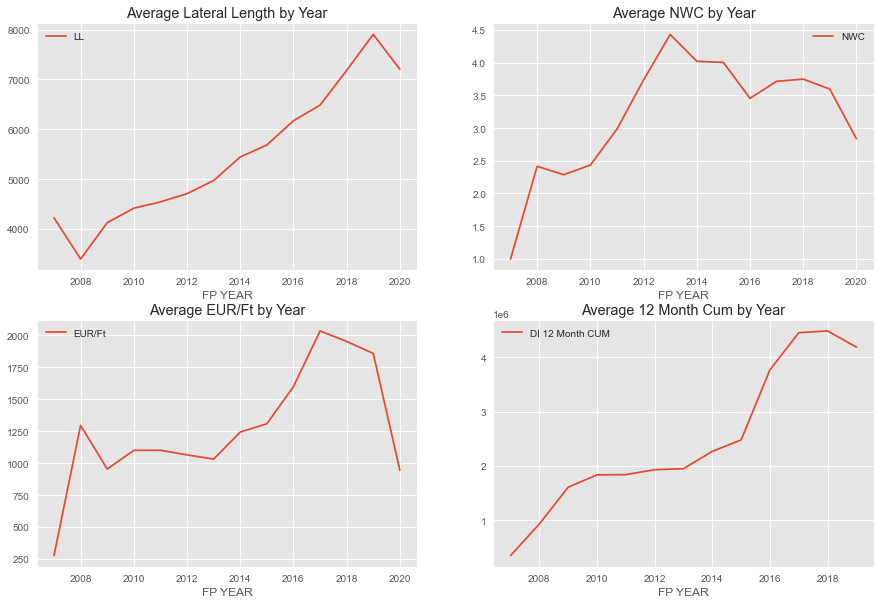

In [50]:
# Plotting grouped data
# Customize plots
plt.style.use(['ggplot'])
fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (15,10)) # Plotting layout

grouped_data.plot(y='LL',title='Average Lateral Length by Year',ax=axes[0,0])
grouped_data.plot(y='NWC',title='Average NWC by Year',ax=axes[0,1])
grouped_data.plot(y='EUR/Ft',title='Average EUR/Ft by Year',ax=axes[1,0])
grouped_data.plot(y='DI 12 Month CUM',title='Average 12 Month Cum by Year',ax=axes[1,1])

## Data Visualization (Matplotlib, Seaborn, Folium)

### Common plot types used for data analysis
######  Univariate plots
- Histograms, distplots, boxplots

##### Multivariate plots
- Scatter plots, line plots, correlation heatmaps

##### Geographical plots
- Geographic information/heatmaps

##### Univariate Plots

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Gas EUR Distribution')

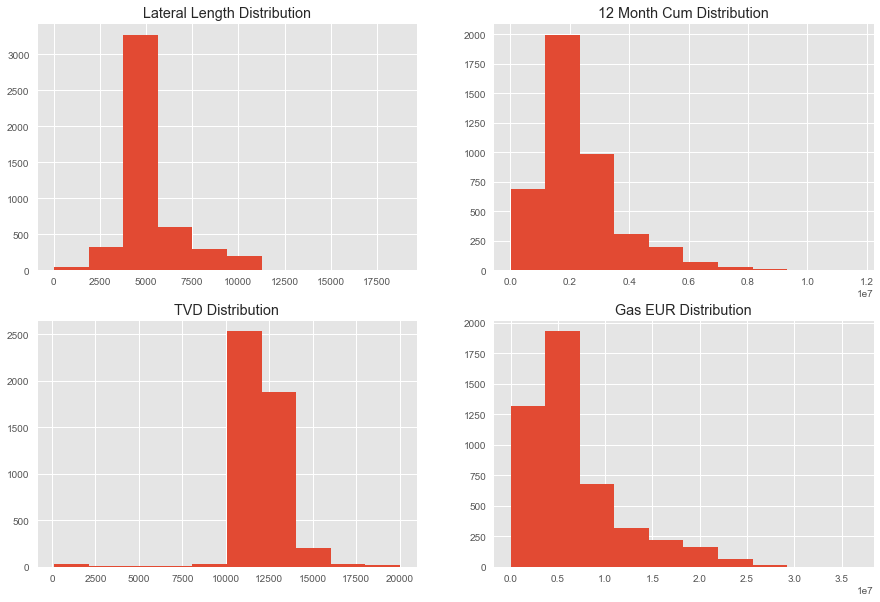

In [51]:
# Matplotlib Histograms
fig,axes = plt.subplots(nrows=2, ncols=2,figsize = (15,10))

axes[0,0].hist(data['LL'])
axes[0,0].set_title("Lateral Length Distribution")

axes[0,1].hist(data['DI 12 Month CUM'])
axes[0,1].set_title("12 Month Cum Distribution")

axes[1,0].hist(data['TVD'])
axes[1,0].set_title("TVD Distribution")

axes[1,1].hist(data['GAS EUR (MCF)'])
axes[1,1].set_title("Gas EUR Distribution")

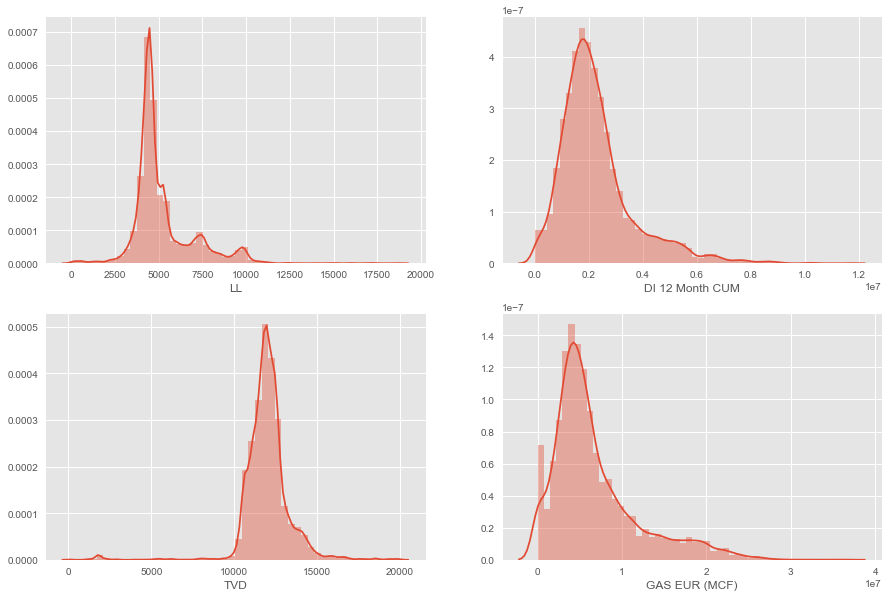

In [52]:
# Seaborn distplot
fig,axes = plt.subplots(nrows=2, ncols=2,figsize = (15,10))

sns.distplot(data['LL'].dropna(),ax=axes[0,0])
sns.distplot(data['DI 12 Month CUM'].dropna(),ax=axes[0,1])
sns.distplot(data['TVD'].dropna(),ax=axes[1,0])
sns.distplot(data['GAS EUR (MCF)'].dropna(),ax=axes[1,1])

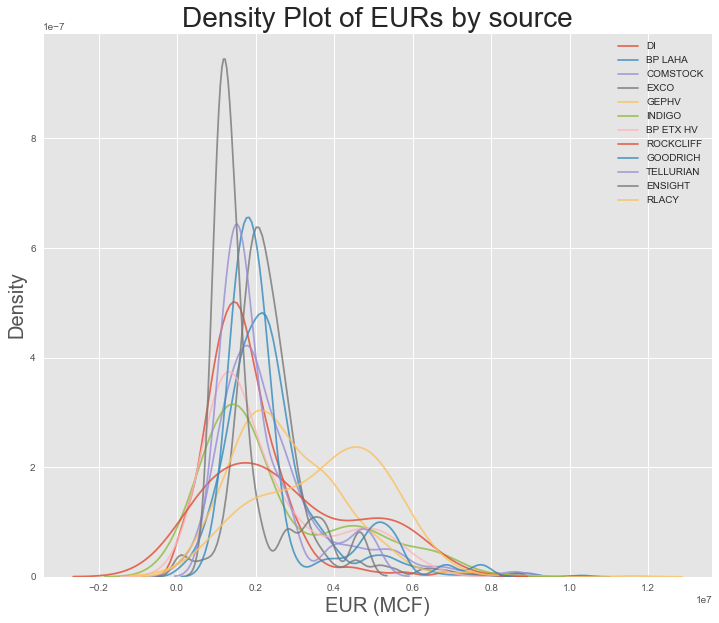

In [53]:
#Create a list of sources
sources = data['SOURCE'].value_counts()
sources = list(sources[sources.values > 1].index)

figsize(12,10)

#Plot each EUR
for s in sources:
    #Select the source
    subset = data[data['SOURCE'] == s]
    
    #Density plot of EURs
    sns.kdeplot(subset['DI 12 Month CUM'].dropna(), label = s, shade = False, alpha = 0.8)

# label the plot
plt.xlabel('EUR (MCF)', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of EURs by source', size = 28);

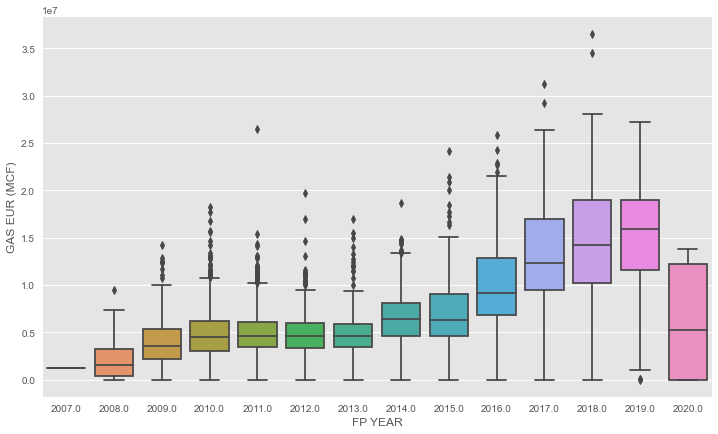

In [54]:
# Seaborn Box plots
fig,axes = plt.subplots(figsize = (12,7))
sns.boxplot(x=data['FP YEAR'], y = data['GAS EUR (MCF)'])

#### Multivariate Plots

Text(0.5, 1.0, '12 Month Cum vs LL')

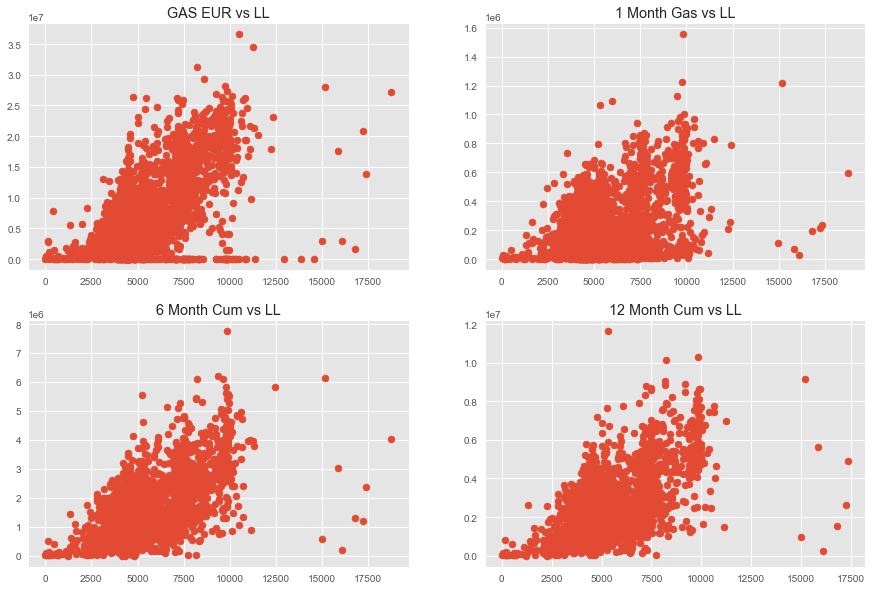

In [55]:
# Matplotlib scatter plot
# Matplotlib Histograms
fig,axes = plt.subplots(nrows=2, ncols=2,figsize = (15,10))

axes[0,0].scatter(data['LL'],data['GAS EUR (MCF)'])
axes[0,0].set_title("GAS EUR vs LL")

axes[0,1].scatter(data['LL'],data['DI 1 Month Gas'])
axes[0,1].set_title("1 Month Gas vs LL")

axes[1,0].scatter(data['LL'],data['DI 6 Month CUM'])
axes[1,0].set_title("6 Month Cum vs LL")

axes[1,1].scatter(data['LL'],data['DI 12 Month CUM'])
axes[1,1].set_title("12 Month Cum vs LL")

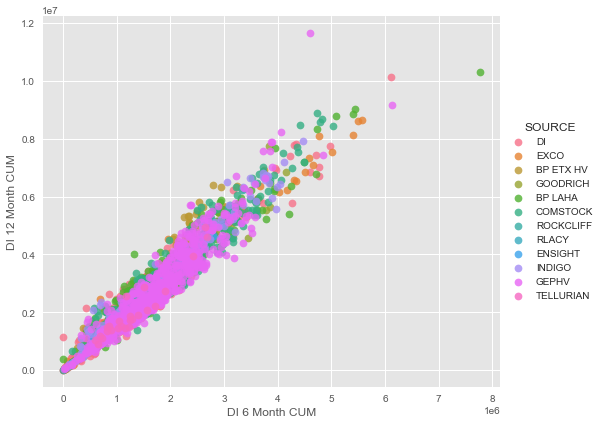

In [56]:
# Seaborn lmplots grouped by source
sns.lmplot(x='DI 6 Month CUM',y='DI 12 Month CUM',
           hue = 'SOURCE', data = data,
           scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
           height = 6, aspect = 1.2)

#### Geographic Plots

In [57]:
# Folium Map
# Create a Map instance
# Sample data to plot
from folium import plugins
#na messes with plots
data_plot = data.dropna()
#data_plot = data

m = folium.Map(location=[np.median(data_plot['BH Latitude']),
                        np.median(data_plot['BH Longitude'])], 
            zoom_start=10)

# Add data to map 
for lat,lon,api,name,field,latlen,eur in zip(data_plot['BH Latitude'],data_plot['BH Longitude'],
data_plot['API14'],data_plot['NAME'],data_plot['FIELD'],data_plot['LL'],data_plot['GAS EUR (MCF)']):
    folium.CircleMarker([lat,lon],
                        #radius=eur / 1500000,
                        radius = 3,
                        weiths = 2,
                        popup=( 
                                'EUR: '+str(eur) + '<br>' 
                                '<br>'
                                'API: '+str(api) + '<br>' 
                                '<br>'
                                'Name: '+str(name) + '<br>' 
                                '<br>'
                                'Field: '+str(field) + '<br>' 
                                '<br>'
                                'Lateral Length: '+str(latlen) + '<br>' 
                                '<br>'

                                ),   
                        color = 'red',
                        fill_color = 'red',
                        fill = True,
                        ).add_to(m)

m.add_child(plugins.HeatMap(data=data_plot[['BH Latitude', 'BH Longitude']].to_numpy(), radius=15, heatMapWeightsCol = 'GAS EUR (MCF)'))

m.save('Haynesville.html')

## Data Exploration Visualizations

### Correlations (Pearson, Spearman, Kendall)

In [58]:
fdata = data.dropna()

#Searson correlation, non-linear correlations
cor = fdata.corr(method ='spearman')

#12 month cum is our correlation target
cor_target = abs(cor["DI 12 Month CUM"])

#You can eliminate features here by specifying a minimum correlation factor
relevant_features = cor_target[cor_target>0.0]

#sort and view all correlation factors
feature_list = pd.DataFrame({'Feature':relevant_features.index, 'Correlation':relevant_features.values})
feature_list = feature_list.sort_values('Correlation')
feature_list.set_index("Feature", inplace=True)
print(feature_list)

                              Correlation
Feature                                  
RANDOM                           0.006595
2010 NWC                         0.007239
2011 NWC                         0.008433
2012 NWC                         0.016811
2013 NWC                         0.018501
RESCAT                           0.023272
2008 NWC                         0.027867
2014 NWC                         0.031739
PetraMidY                        0.033345
SH Latitude                      0.034909
BH Latitude                      0.036086
API12                            0.039314
API14                            0.039314
API                              0.039314
2009 NWC                         0.044577
OGIP (4% Phi Cutoff)             0.052937
2015 NWC                         0.064362
LINE                             0.099107
NUMBER                           0.099107
OGIP/GT (4% Phi Cutoff)          0.114887
2016 NWC                         0.130327
TVD                              0

### Feature Selection

In [59]:
#Number is arbitrary so anything listed below number has no real Pearson correlation
min_cor = feature_list.loc['NUMBER'].values[0] + .001

#remove the features below the threshold from our feature list
for index, row in feature_list.iterrows():
    if row['Correlation'] < min_cor:
        feature_list.drop(index,inplace=True)

feature_list

,Correlation
Feature,
OGIP/GT (4% Phi Cutoff),0.114887
2016 NWC,0.130327
TVD,0.194387
OIL EUR (BBL),0.195729
Net to Gross (4% Phi Cutoff),0.225215
OGIP (8% Phi Cutoff),0.245577
2017 NWC,0.250083
As Drilled NWC,0.281766
Net to Gross (8% Phi Cutoff),0.300731


In [60]:
#only keep the features in our feature list in our dataset
for col in fdata.columns:
    f = False
    for index, row in feature_list.iterrows():
        if index == col:
            f = True
    if f == False:
        del fdata[col]

fdata = fdata.drop(columns=['2016 NWC','OIL EUR (BBL)','2017 NWC','2018 NWC','SH Longitude','BH Longitude','ELEVATION (GROUND)','EUR/Ft','GAS EUR (MCF)','OGIP/GT (4% Phi Cutoff)','Net to Gross (4% Phi Cutoff)'])
       
fdata

,PetraMidX,ELEVATION (KB),TVD,LL,LBS/FT,FP YEAR,NWC,As Drilled NWC,Net to Gross (8% Phi Cutoff),OGIP (8% Phi Cutoff),OGIP/GT (8% Phi Cutoff),DI Practical IP,DI Gas Daily Rate,DI 1 Month Gas,DI 6 Month CUM,DI 12 Month CUM,DI First Test Gas Volume
0,1337858.35,289.12,11484.00,4062.0,659.211144,2008.0,1.480434,0.814100,0.60,120.99,0.519181,2789.2903,376.9691,123817.0,390459.0,490004.0,3979.0
1,1355135.90,275.56,11706.00,4224.0,352.000000,2007.0,0.998251,0.843008,0.73,118.00,0.587445,2172.9667,208.1233,55393.0,263211.0,348610.0,2647.0
2,1372326.50,195.00,14550.00,3049.0,2957.976243,2008.0,0.766312,0.595234,0.63,104.22,0.511459,4455.3548,907.5027,54307.0,511717.0,718823.0,4634.0
3,1335205.15,339.00,11412.19,4027.0,0.000000,2008.0,2.221564,0.842586,0.48,105.85,0.455759,2196.2903,267.2334,63926.0,290997.0,426304.0,3720.0
4,1360611.40,280.00,11596.56,3687.0,496.000000,2008.0,2.953830,1.504753,0.66,112.38,0.531071,252.1379,390.9984,53833.0,418617.0,736836.0,2645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,1217903.85,313.00,10584.00,6653.0,1698.548622,2014.0,6.269431,5.559806,0.19,25.97,0.121954,4279.5667,2463.3491,8330.0,1002793.0,1898008.0,22848.0
4745,1215128.05,358.00,10602.00,5375.0,1766.715460,2014.0,4.812152,4.770879,0.18,24.12,0.114150,4890.4194,1829.5053,20153.0,736516.0,1513741.0,6291.0
4746,1214602.85,359.00,10495.00,4895.0,1827.243921,2014.0,3.943102,3.810792,0.18,23.78,0.112824,7010.1613,2174.0248,29407.0,926354.0,1779952.0,8820.0
4747,1216839.10,316.00,10471.13,8059.0,1634.011123,2014.0,5.850088,5.675816,0.18,25.25,0.118779,10915.5333,2457.0757,12894.0,1132697.0,2099925.0,35589.0


### Correlation matrix of selected features

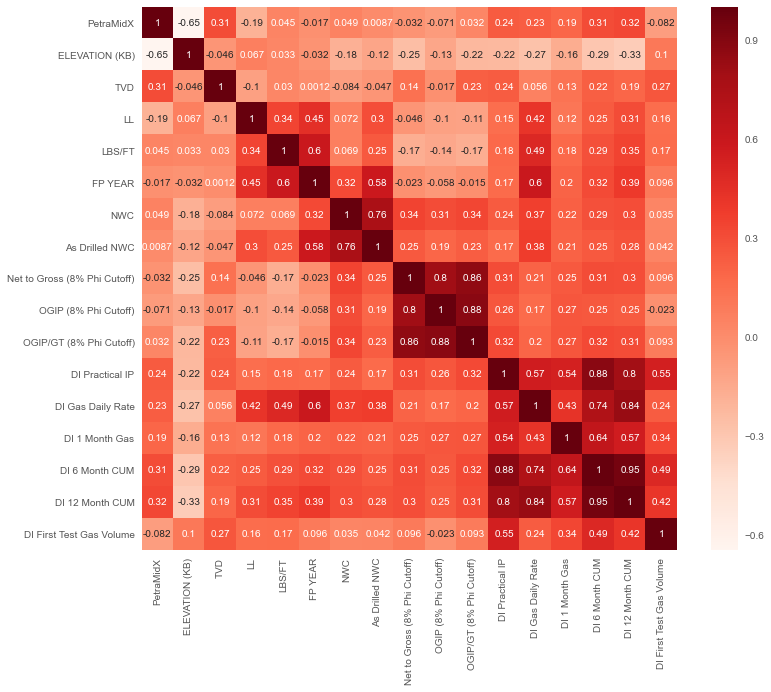

In [61]:
#show heatmap        
plt.figure(figsize=(12,10))
cor = fdata.corr(method ='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Correlation Plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


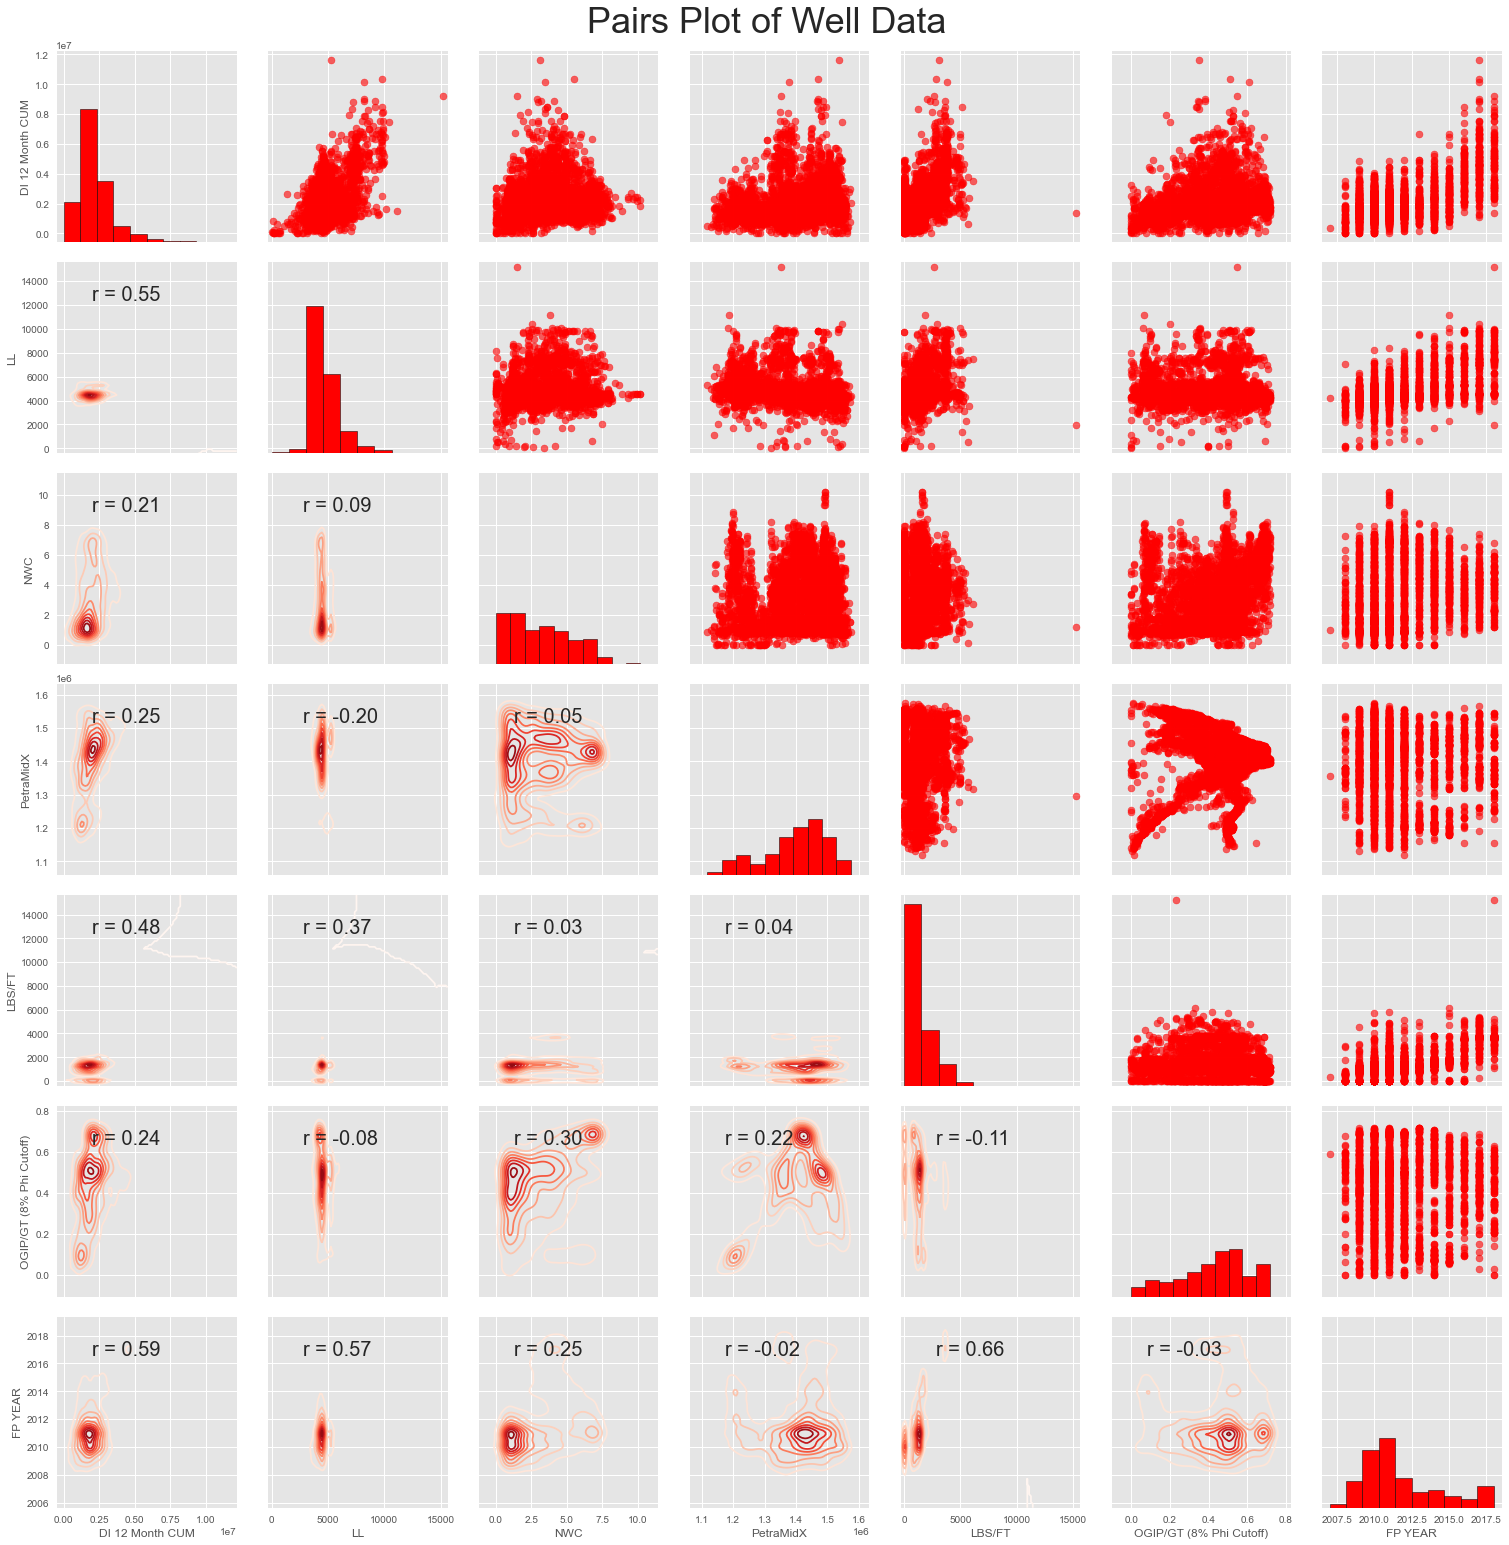

In [62]:
plot_data = fdata[['DI 12 Month CUM','LL','NWC','PetraMidX','LBS/FT','OGIP/GT (8% Phi Cutoff)','FP YEAR']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)
    
# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Well Data', size = 36, y = 1.02);

### Exploratory Data Analysis

In [63]:
#EDA using sweetviz
advert_report = sv.analyze(fdata)

advert_report.show_html('Haynesville.html')

:FEATURES DONE:                    |                     | [  0%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


### Inlier/Outlier Detection

OUTLIERS :  188 INLIERS :  3521 Angle-based Outlier Detector (ABOD)


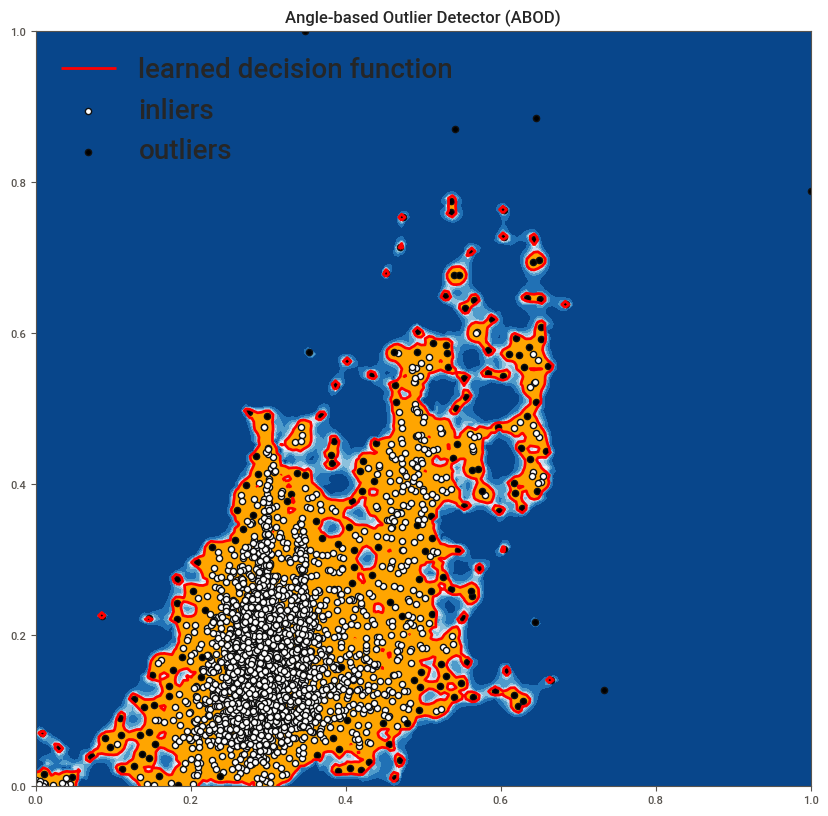

C:\Users\dclements\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


OUTLIERS :  186 INLIERS :  3523 Cluster-based Local Outlier Factor (CBLOF)


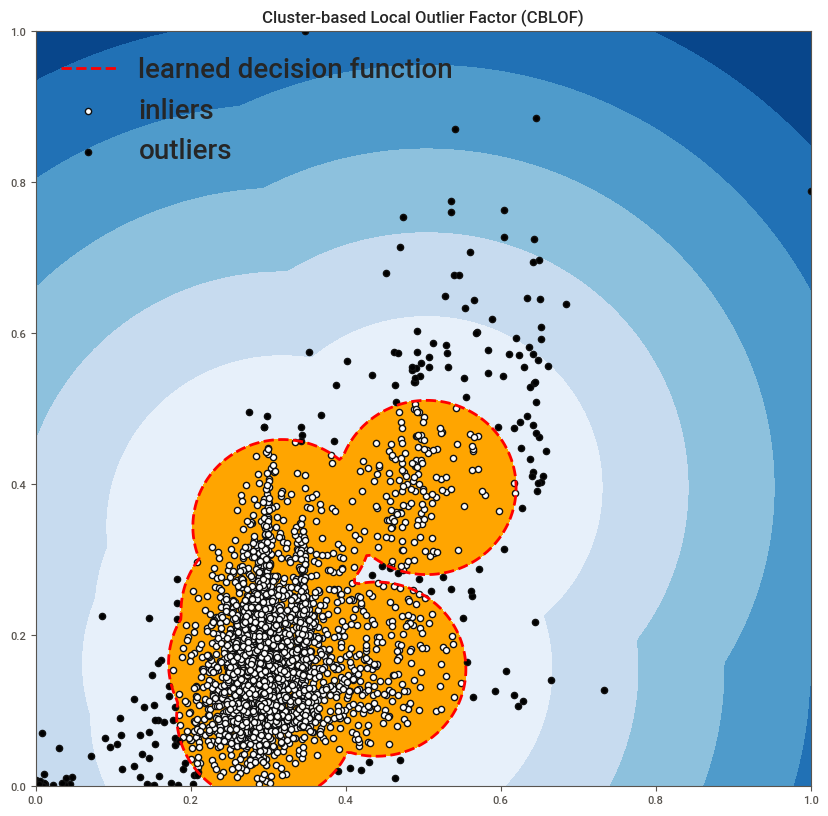

OUTLIERS :  171 INLIERS :  3538 Feature Bagging


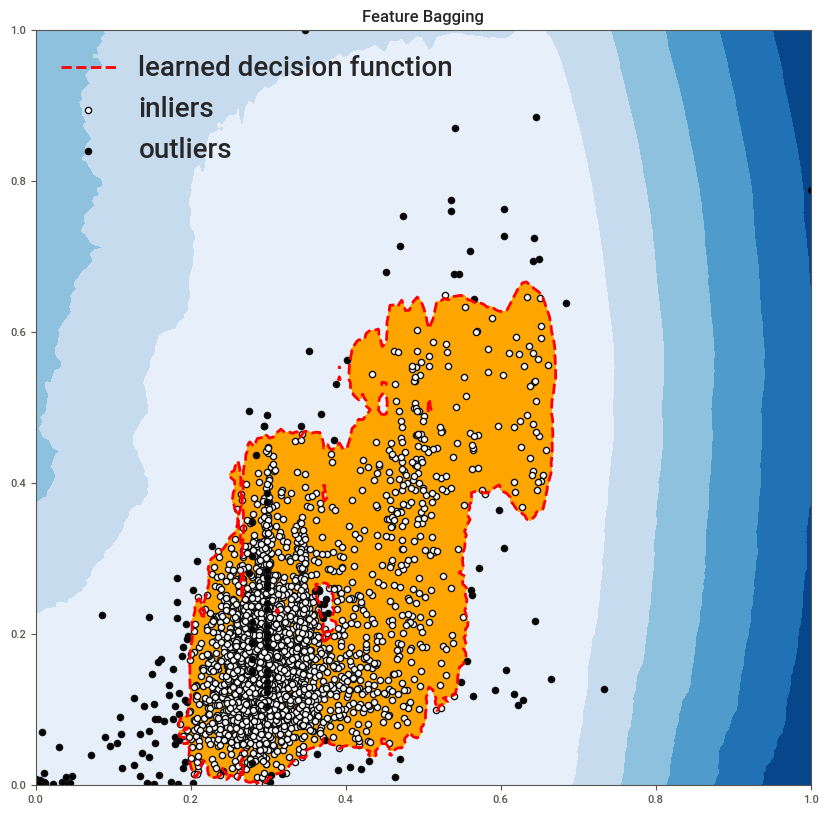

OUTLIERS :  153 INLIERS :  3556 Histogram-base Outlier Detection (HBOS)


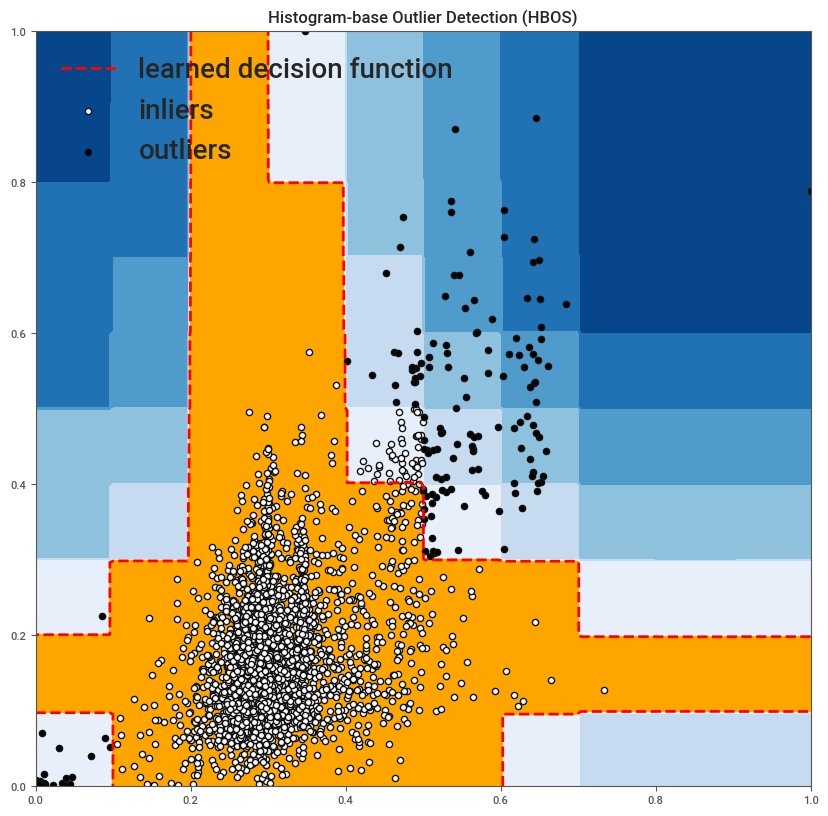

OUTLIERS :  186 INLIERS :  3523 Isolation Forest


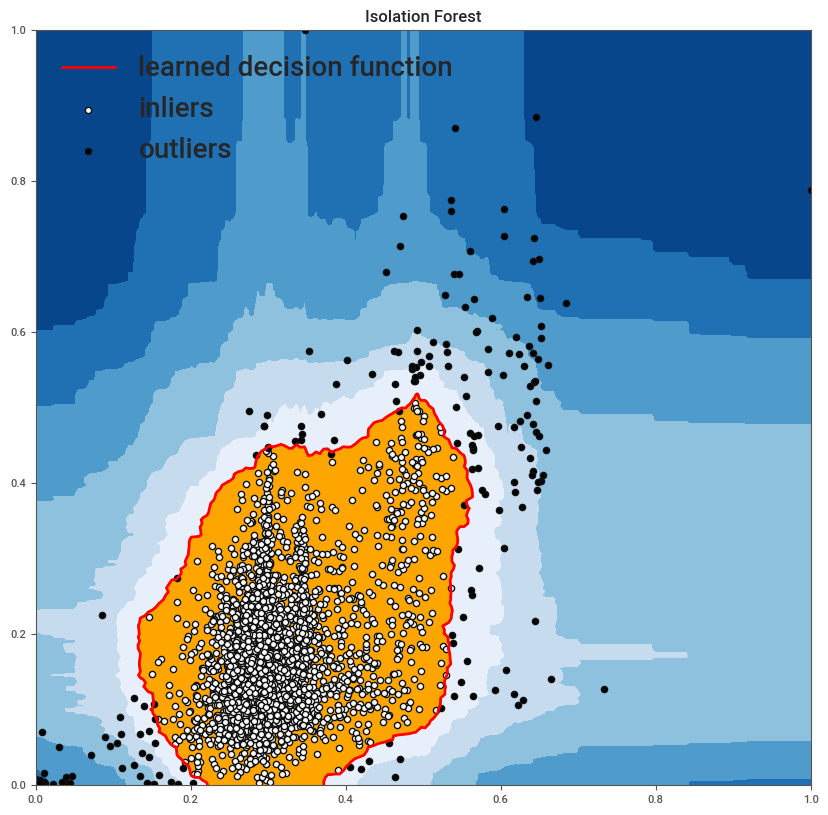

OUTLIERS :  157 INLIERS :  3552 K Nearest Neighbors (KNN)


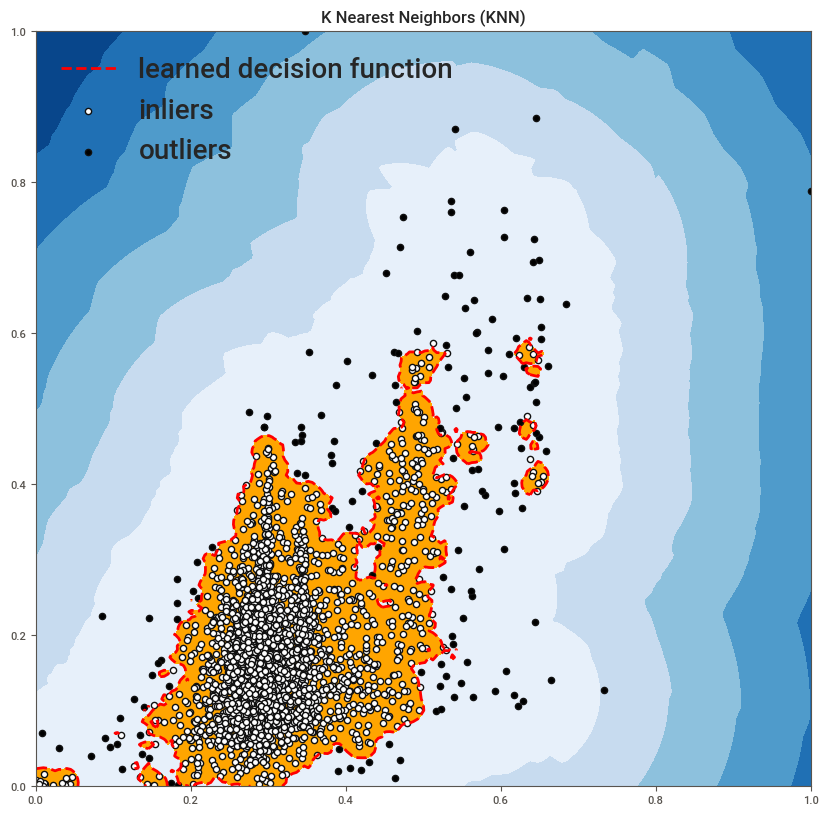

OUTLIERS :  101 INLIERS :  3608 Average KNN


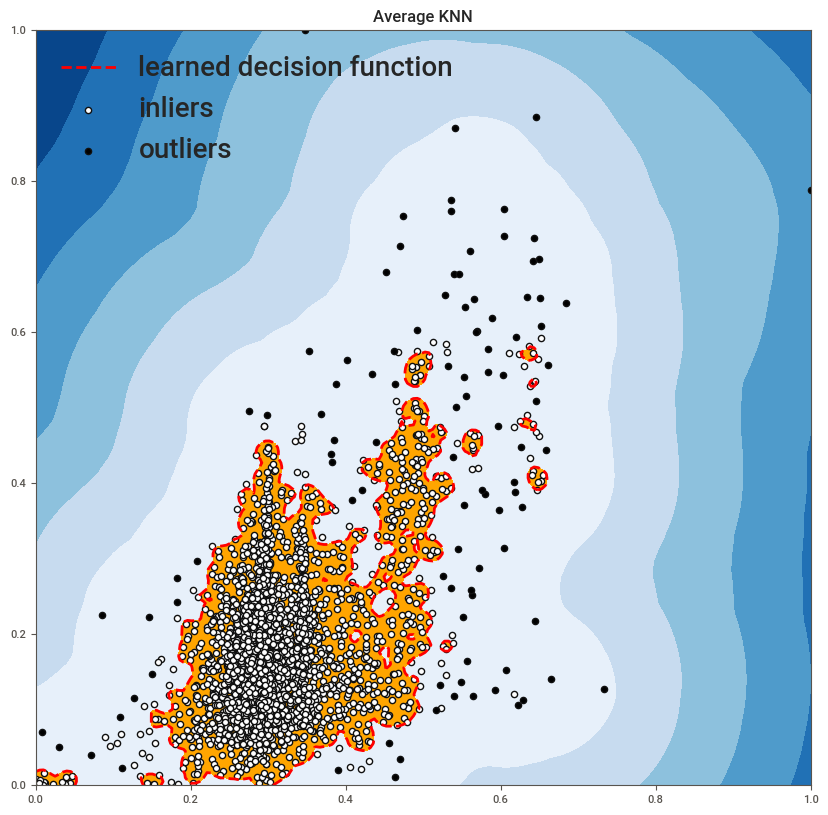

In [64]:
scaler = MinMaxScaler(feature_range=(0, 1))
fdata[['LL','DI 12 Month CUM']] = scaler.fit_transform(fdata[['LL','DI 12 Month CUM']])

X1 = fdata['LL'].values.reshape(-1,1)
X2 = fdata['DI 12 Month CUM'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

random_state = np.random.RandomState(42)
outliers_fraction = 0.05
# Define seven outlier detection tools to be compared
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

xx , yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = fdata
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['LL'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['DI 12 Month CUM'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['LL'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['DI 12 Month CUM'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()

### RadViz Multiple Variable Vizualization

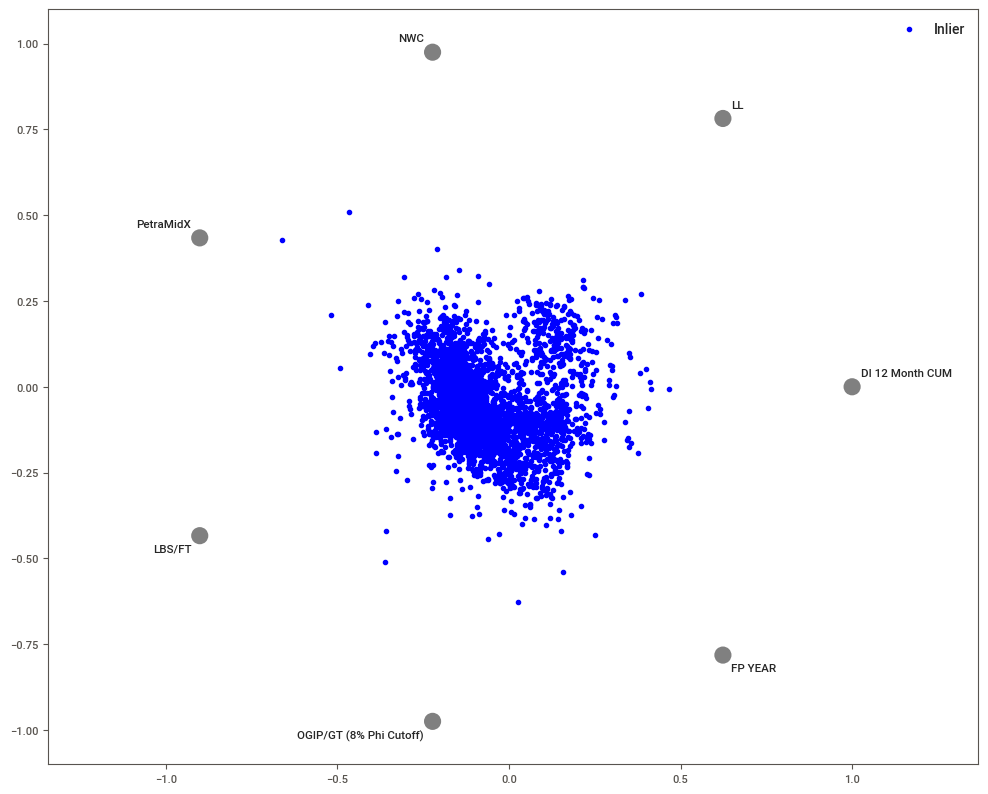

In [82]:
plot_data['Outliers'] = 'Inlier'
pd.plotting.radviz(plot_data,'Outliers',color=['blue'])

In [ ]:
#Remove outlier column from evaluation
plot_data = plot_data.drop(columns='Outliers')

### Isolation Forest to find Multivariate outliers

C:\Users\dclements\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


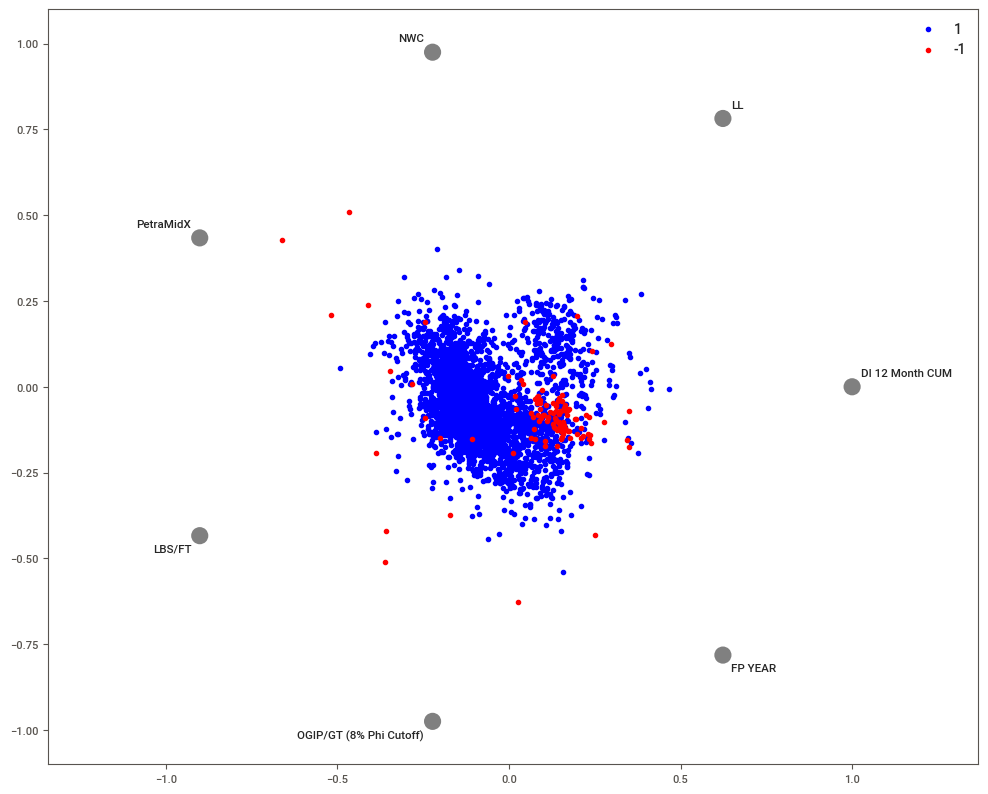

In [81]:
#Multivariate outlier detection
isf = IsolationForest(behaviour = "new", random_state = 42, max_samples = 200, n_estimators = 100, contamination = 0.03)
isf.fit(plot_data)

#-1 are outliers, 1 are inliers
outliers = isf.predict(plot_data)

#Merge full_features and outliers
plot_data['Outliers'] = outliers

pd.plotting.radviz(plot_data,'Outliers',color=['blue','red'])